In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
from pathlib import Path
import os
data_path = Path("/content/drive/MyDrive/WHISPERS/example_data")
new_path = Path("data")
with zipfile.ZipFile(data_path / "C2Seg_AB_example.zip", "r") as zip_ref:
    print("Unzipping C2Seg_AB_example data...")
    zip_ref.extractall(new_path)

Unzipping C2Seg_AB_example data...


In [ ]:
import requests
from pathlib import Path

def download_py(file_name:str, path:str=None):
  if path == None:
    path = "https://raw.githubusercontent.com/canmike/lulc_semantic_segmentation/main/" + file_name

  if Path(file_name).is_file():
    print(f"{file_name} already exists, skipping download")
  else:
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get(path)
    with open(file_name, "wb") as f:
      f.write(request.content)
    print(f"Downloaded {file_name}.")

download_py("utils.py")

utils.py already exists, skipping download


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import torch
import numpy as np
import matplotlib.pyplot as plt

def apply_pca_to_multiband(img, n_components: int):
  # Reshape the tensor to [bands, pixels]
  reshaped_data = img.view(img.shape[0], -1).numpy()

  # Perform PCA
  pca = PCA(n_components=n_components)
  pca_result = pca.fit_transform(reshaped_data.T)

  # Reshape back to [bands, height, width]
  pca_result = pca_result.T.reshape((n_components, img.shape[1], img.shape[2]))
  return pca_result, pca.explained_variance_ratio_

[0.7354079  0.233673   0.01400925 0.00866589] 0.991756


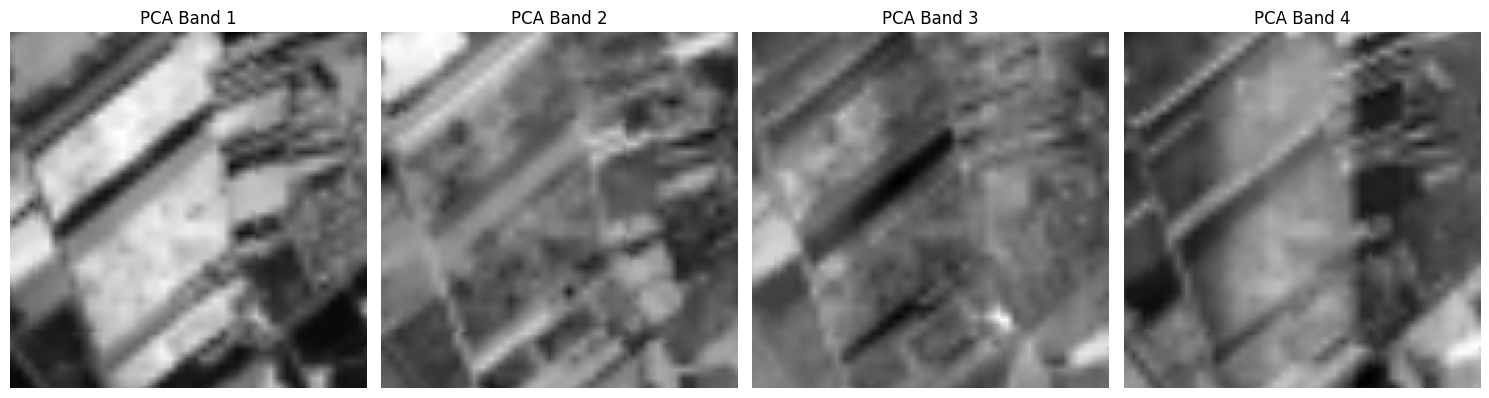

In [ ]:
from utils import get_img, get_hsi, get_msi, get_sar
index=9
hsi, mask = get_img(index, file_path='/content/data/C2Seg_AB_example', use_msi=True, use_sar=True, use_hsi=True, reduce_hsi=False)
hsi = hsi[0]

n_components=4
pca_result, variance_ratio = apply_pca_to_multiband(hsi, n_components)
print(variance_ratio, variance_ratio.sum())

# Plot the original and PCA-transformed images
fig, axs = plt.subplots(1, n_components, figsize=(15, 10))

for i in range(n_components):
    axs[i].imshow(pca_result[i], cmap='gray')
    axs[i].set_title(f'PCA Band {i + 1}')
    axs[i].axis('off')  # Turn off axis for better visualization

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()